In [42]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import glob
import os
import math
from os import listdir
import data_visualization as dv
import pickle
import scipy 
from scipy.stats import norm
from scipy import stats
from tqdm import tqdm 
import random
wheel = dv.ColorWheel()

In [43]:
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.style.use('cashaback_dark')

#%% Plot properties
box_lw = 2.5 #box linewidth
boxwidth = .07 #box width
whisker_lw = 2.0 #whisker linewidth
circle_size = 8 

tp3_title = "1000,50"
tp4_title = "1000,150"
tp5_title = '1100,50'
tp6_title = "1100,150"
tp7_title = "1200,50"
tp8_title = '1200,150'
tp9_title = '1300,100'
tp10_title = '1300,200'
trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title, tp7_title, tp8_title]

box_color1 = wheel.seth_red
box_color2 = wheel.seth_blue
box_color3 = '0.4'
#boxprops
two_props = {"facecolor": "none", "edgecolor" : box_color1, "linewidth": box_lw, "alpha": 1}
three_props = {"facecolor": "none", "edgecolor" : box_color2, "linewidth": box_lw, "alpha": 1}
four_props = {"facecolor": "none", "edgecolor" : box_color3, "linewidth": box_lw, "alpha": 1}
#whiskerprops
two_whisk = {"linewidth" : whisker_lw, "color": box_color1}
three_whisk = {"linewidth" : whisker_lw, "color": box_color2}
four_whisk = {"linewidth" : whisker_lw, "color": box_color3}
#capprops
two_cap = {"linewidth" : whisker_lw, "color": box_color1}
three_cap = {"linewidth" : whisker_lw, "color": box_color2}
four_cap = {"linewidth" : whisker_lw, "color": box_color3}
#medianprops
two_median = {"linewidth" : whisker_lw, "color": box_color1}     
three_median = {"linewidth" : whisker_lw, "color": box_color2}   
four_median = {"linewidth" : whisker_lw, "color": box_color3}        
    
#total_indecisions = np.concatenate((perc_player_indecisions,perc_indecisions_R))
props = [{}, {}, {}, {}, {}, {}]
props_dict = {}
box_color = 'grey'
dot_color = 'black'   

In [44]:
# Initial thangs
os.chdir('D:\\Subject_Data\\Seth_MatchPennies_Agent_Pilot_v3')
PATH = os.getcwd()
save_path = '\\Figures\\'
if not os.path.exists(PATH+save_path):
        os.makedirs(PATH+save_path)

with open(PATH+"\\Analysis_Pull_List.txt","r") as pull_file:
    analysis_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt","r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()  
# SPECIFIC TO EXPERIMENT   
reaction_trials = 50    
timing_trials = 50
num_trials = 100 #number of trials in each block 
num_blocks = 6
tot_trials = num_trials*num_blocks
data_columns = len(fields_pull)
trial_time = 1500
num_subjects = len(analysis_pull_list)
wheel = dv.ColorWheel()

plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = "bold"

### Pickle

In [45]:
#%% Pickle load 
player_wins = np.zeros((num_subjects, num_blocks))
player_indecisions = np.zeros((num_subjects, num_blocks))
perc_player_wins = np.zeros((num_subjects, num_blocks))
perc_player_wins_first_half = np.zeros((num_subjects, num_blocks))
perc_player_wins_second_half = np.zeros((num_subjects, num_blocks))
perc_player_wins_cut_off = np.zeros((num_subjects, num_blocks))
perc_player_indecisions = np.zeros((num_subjects, num_blocks))
perc_player_indecisions_first_half = np.zeros((num_subjects, num_blocks))
perc_player_indecisions_second_half = np.zeros((num_subjects, num_blocks))
perc_player_indecisions_cut_off = np.zeros((num_subjects, num_blocks))
trial_table = np.empty((num_subjects, tot_trials, 4), int)
player_reach_time = np.zeros([num_subjects,num_blocks,num_trials])*np.nan 
player_decision_array = np.zeros([num_subjects,num_blocks,num_trials])*np.nan 
reaction_time = np.zeros([num_subjects,reaction_trials])*np.nan 
reaction_movement_time = np.zeros([num_subjects,reaction_trials])*np.nan 
rt_trial_start = np.zeros((num_subjects,reaction_trials))*np.nan 
timing_reach_time = np.zeros([num_subjects,reaction_trials])*np.nan 
hand_pos_data = np.zeros((num_subjects, num_blocks, num_trials, trial_time+500, 4))*np.nan
agent_decision_time = np.zeros((num_subjects,num_blocks,num_trials))
agent_target_selection = np.zeros((num_subjects,num_blocks,num_trials))
player_incorrects = np.zeros((num_subjects,num_blocks))
perc_player_incorrects = np.zeros((num_subjects,num_blocks))
perc_player_incorrects_first_half = np.zeros((num_subjects, num_blocks))
perc_player_incorrects_second_half = np.zeros((num_subjects, num_blocks))
perc_player_incorrects_cut_off = np.zeros((num_subjects, num_blocks))
player_decision_time = np.zeros([num_subjects,num_blocks,num_trials])*np.nan 
for i in range(num_subjects):
    subname = analysis_pull_list[i]
    data_path = PATH+f'\\Subjects_Analyzed\\{subname}\\'
    player_indecisions[i,:] = pickle.load(open(data_path + f'{subname}_player_indecisions.pkl', 'rb'))
    player_wins[i,:] = pickle.load(open(data_path + f'{subname}_player_wins.pkl', 'rb'))
    perc_player_indecisions[i,:] = pickle.load(open(data_path + f'{subname}_perc_player_indecisions.pkl', 'rb'))
    perc_player_indecisions_first_half[i,:] = pickle.load(open(data_path + f'{subname}_perc_player_indecisions_first_half.pkl', 'rb'))
    perc_player_indecisions_second_half[i,:] = pickle.load(open(data_path + f'{subname}_perc_player_indecisions_second_half.pkl', 'rb'))
    perc_player_indecisions_cut_off[i,:] = pickle.load(open(data_path + f'{subname}_perc_player_indecisions_cut_off.pkl', 'rb'))
    
    perc_player_wins[i,:] = pickle.load(open(data_path + f'{subname}_perc_player_wins.pkl', 'rb'))
    perc_player_wins_first_half[i,:] = pickle.load(open(data_path + f'{subname}_perc_player_wins_first_half.pkl', 'rb'))
    perc_player_wins_second_half[i,:] = pickle.load(open(data_path + f'{subname}_perc_player_wins_second_half.pkl', 'rb'))
    perc_player_wins_cut_off[i,:] = pickle.load(open(data_path + f'{subname}_perc_player_wins_cut_off.pkl', 'rb'))
    
    perc_player_incorrects[i,:] = pickle.load(open(data_path + f'{subname}_perc_player_incorrect_decisions.pkl', 'rb'))
    perc_player_incorrects_first_half[i,:] = pickle.load(open(data_path + f'{subname}_perc_player_incorrect_decisions_first_half.pkl', 'rb'))
    perc_player_incorrects_second_half[i,:] = pickle.load(open(data_path + f'{subname}_perc_player_incorrect_decisions_second_half.pkl', 'rb'))
    perc_player_incorrects_cut_off[i,:] = pickle.load(open(data_path + f'{subname}_perc_player_incorrect_decisions_cut_off.pkl', 'rb'))
    #trial_table[i,:,:] = pickle.load(open(data_path + f'{subname}_trial_table.pkl', 'rb'))
    hand_pos_data[i,:,:,:,:] = pickle.load(open(data_path+f'{subname}_hand_pos_data.pkl', 'rb'))
    reaction_time[i,:] = pickle.load(open(data_path + f'{subname}_reaction_time.pkl', 'rb'))
    reaction_movement_time[i,:] = pickle.load(open(data_path + f'{subname}_reaction_movement_time.pkl', 'rb'))
    rt_trial_start[i,:] = pickle.load(open(data_path + f'{subname}_rt_trial_start.pkl', 'rb'))
    agent_decision_time[i,:,:] = pickle.load(open(data_path + f'{subname}_agent_decision_time.pkl', 'rb'))
    agent_target_selection[i,:,:] = pickle.load(open(data_path + f'{subname}_agent_target_selection.pkl', 'rb'))
    player_incorrects[i,:] = pickle.load(open(data_path + f'{subname}_player_incorrect_decisions.pkl', 'rb'))
    player_reach_time[i,:,:] = pickle.load(open(data_path + f'{subname}_player_reach_time.pkl', 'rb'))
    player_decision_time[i,:,:] = pickle.load(open(data_path + f'{subname}_player_decision_time.pkl', 'rb'))
    player_decision_array[i,:] = pickle.load(open(data_path + f'{subname}_player_decision_array.pkl', 'rb'))
    timing_reach_time[i,:] = pickle.load(open(data_path + f'{subname}_timing_reach_time.pkl', 'rb'))


In [51]:
reaction_time_mean = np.nanmean(reaction_time[:,25:], axis = 1)
reaction_time_sd = np.nanstd(reaction_time[:,25:], axis = 1)

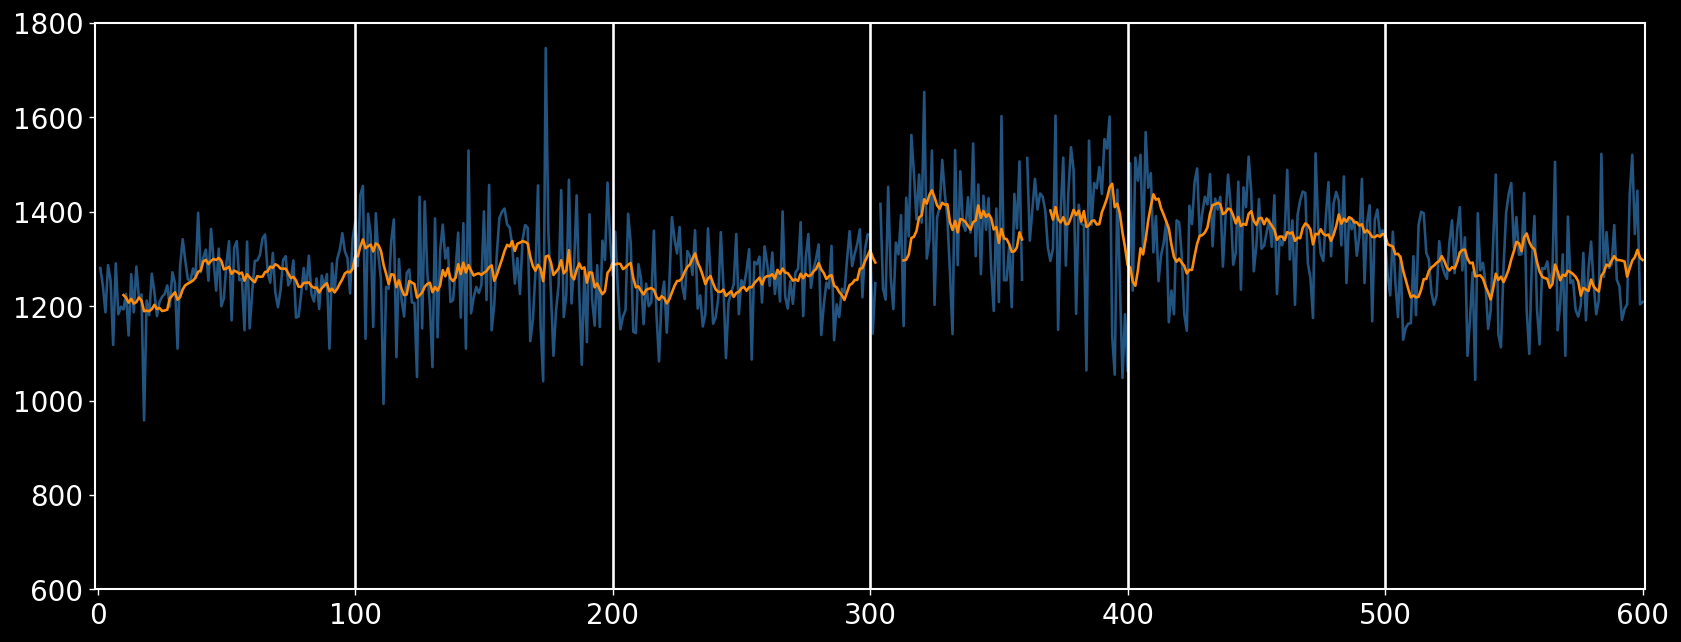

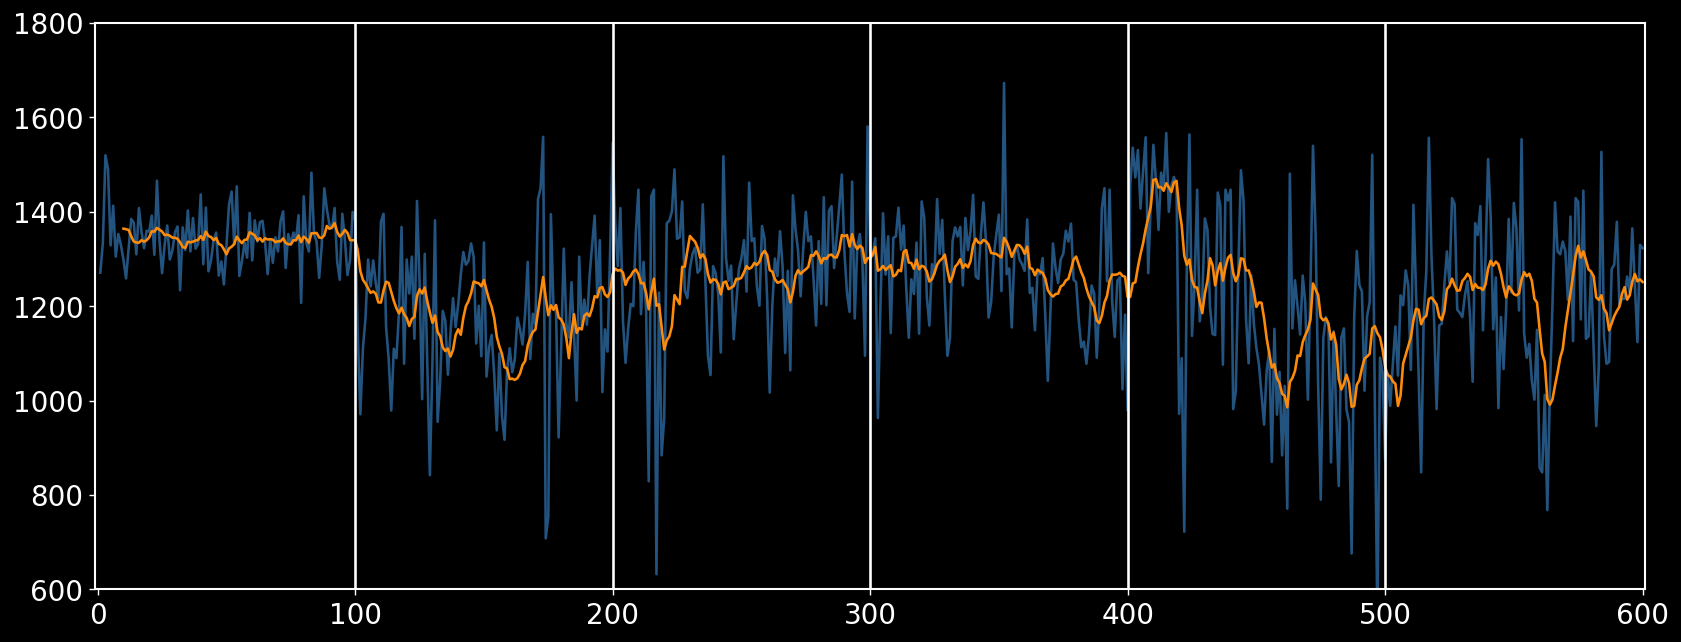

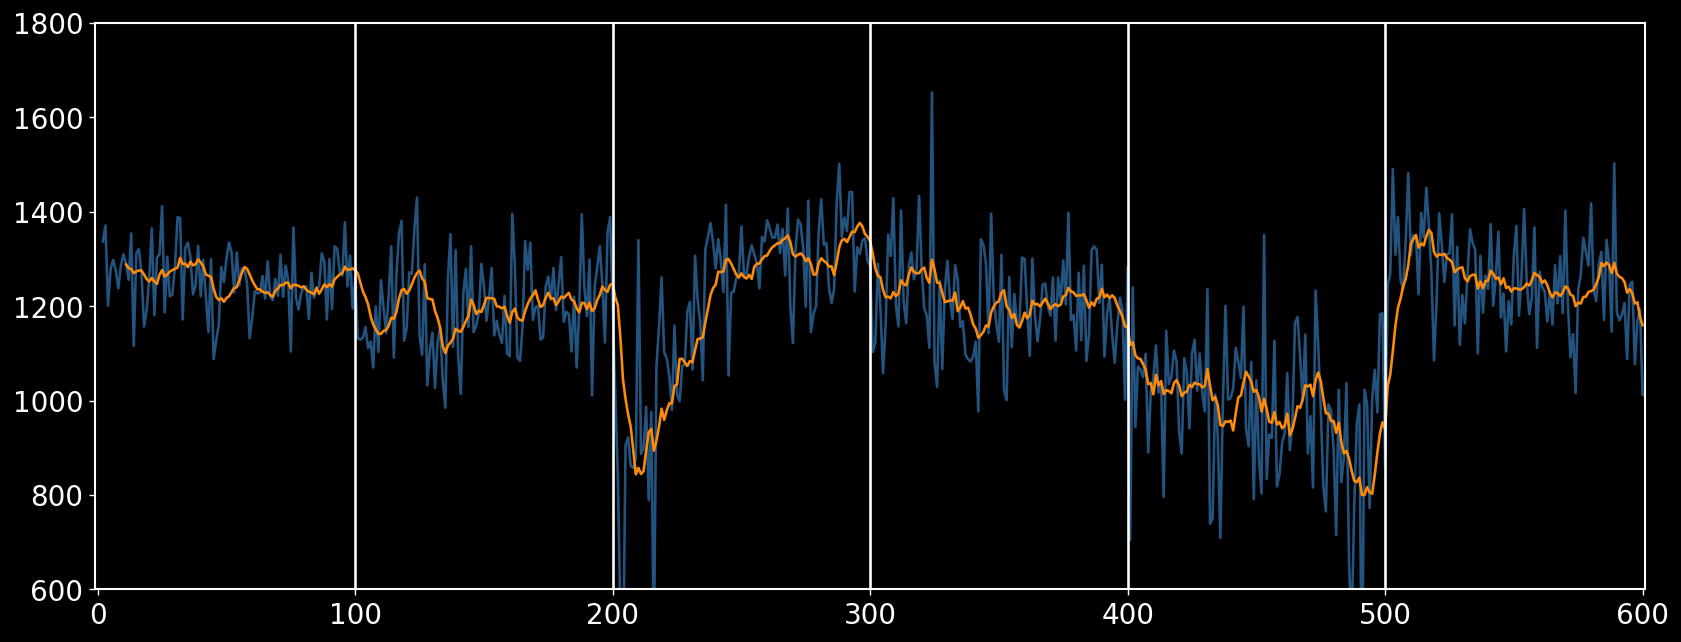

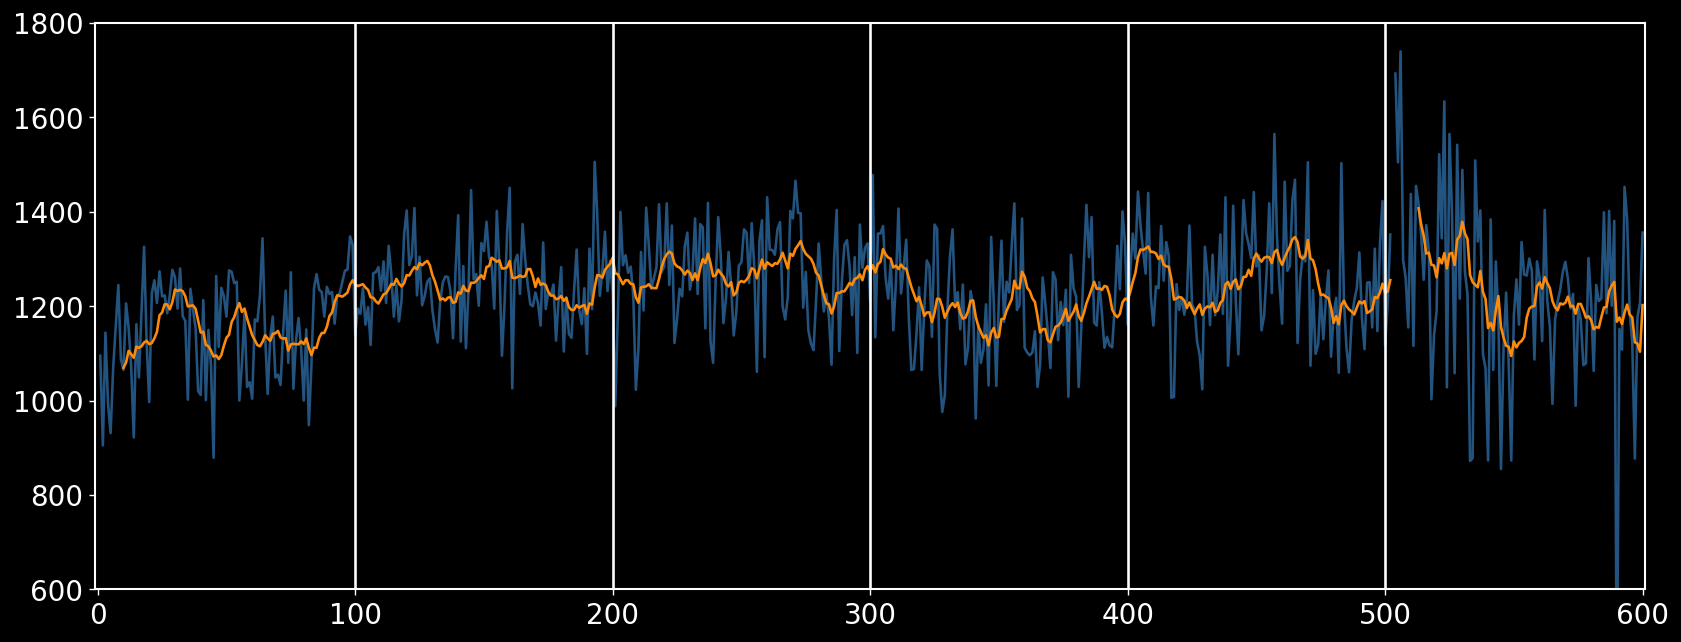

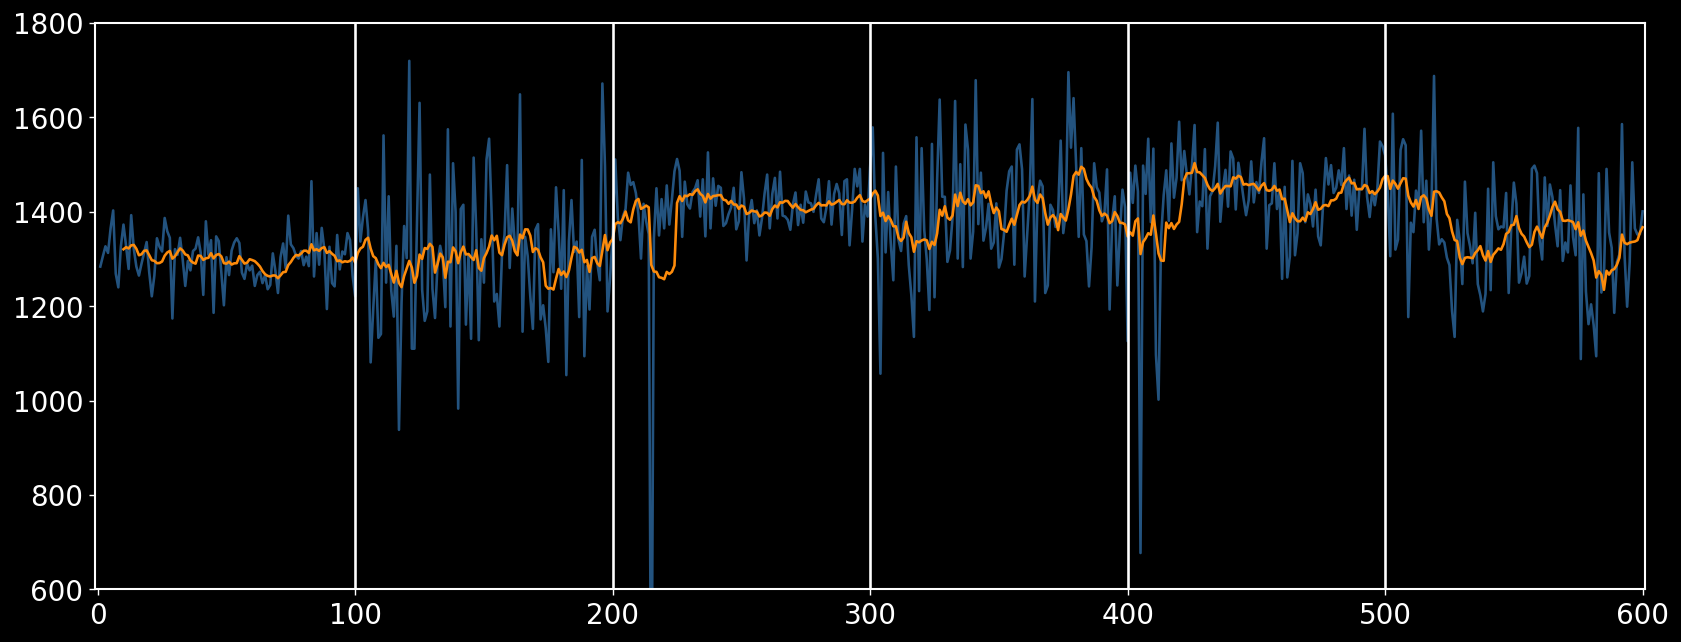

In [53]:
player_decision_time_all_conditions = np.reshape(player_decision_time,(num_subjects,-1))
agent_decision_time_all_conditions = np.reshape(agent_decision_time,(num_subjects,-1))
trial_num = np.arange(1,tot_trials+1)
block_cut = [100,200,300,400,500]
# Calculate running mean
N = 10
running_avg = np.zeros((num_subjects,tot_trials))
nan_array = np.zeros((N-1))*np.nan

for i in range(num_subjects):
    temp = np.convolve(player_decision_time_all_conditions[i,:], np.ones(N)/N, mode='valid')
    running_avg[i,:] = np.concatenate((nan_array,temp))
for i in range(num_subjects):
    fig,ax = plt.subplots(dpi=125, figsize = (16,6))
    ax.plot(trial_num,player_decision_time_all_conditions[i,:])
    ax.plot(trial_num,running_avg[i,:])
    for j in range(num_blocks-1):
        ax.axvline(x=block_cut[j])
        
    ax.set_xlim(-1,601)
    ax.set_ylim(600,1800)
    

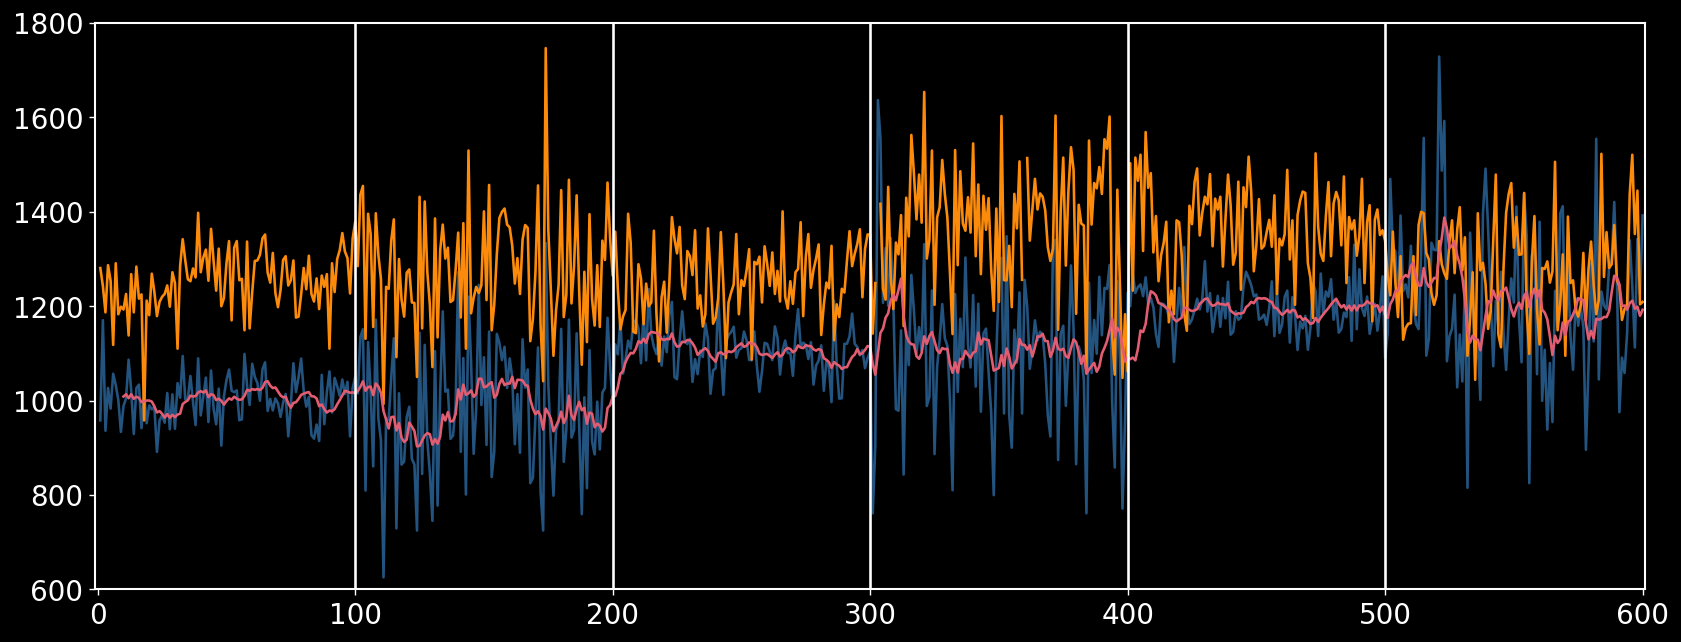

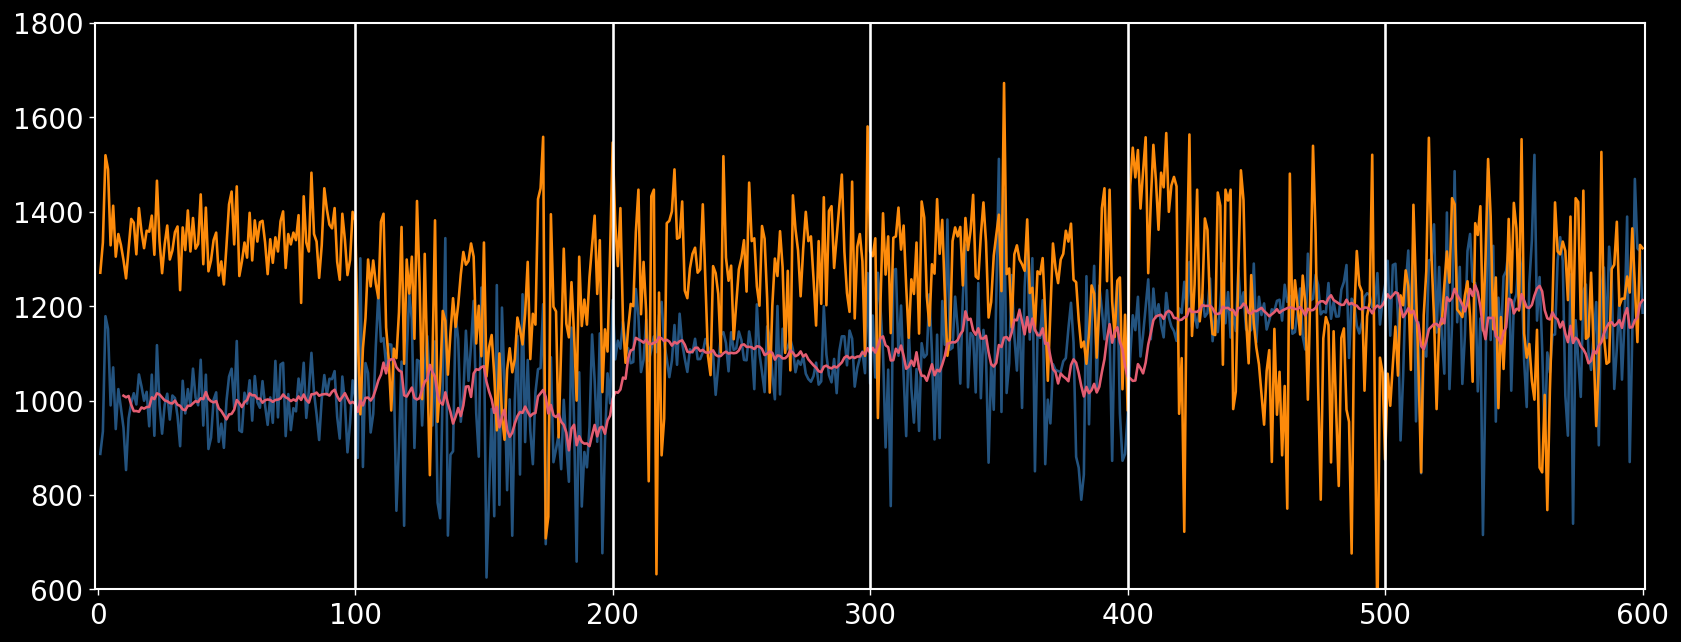

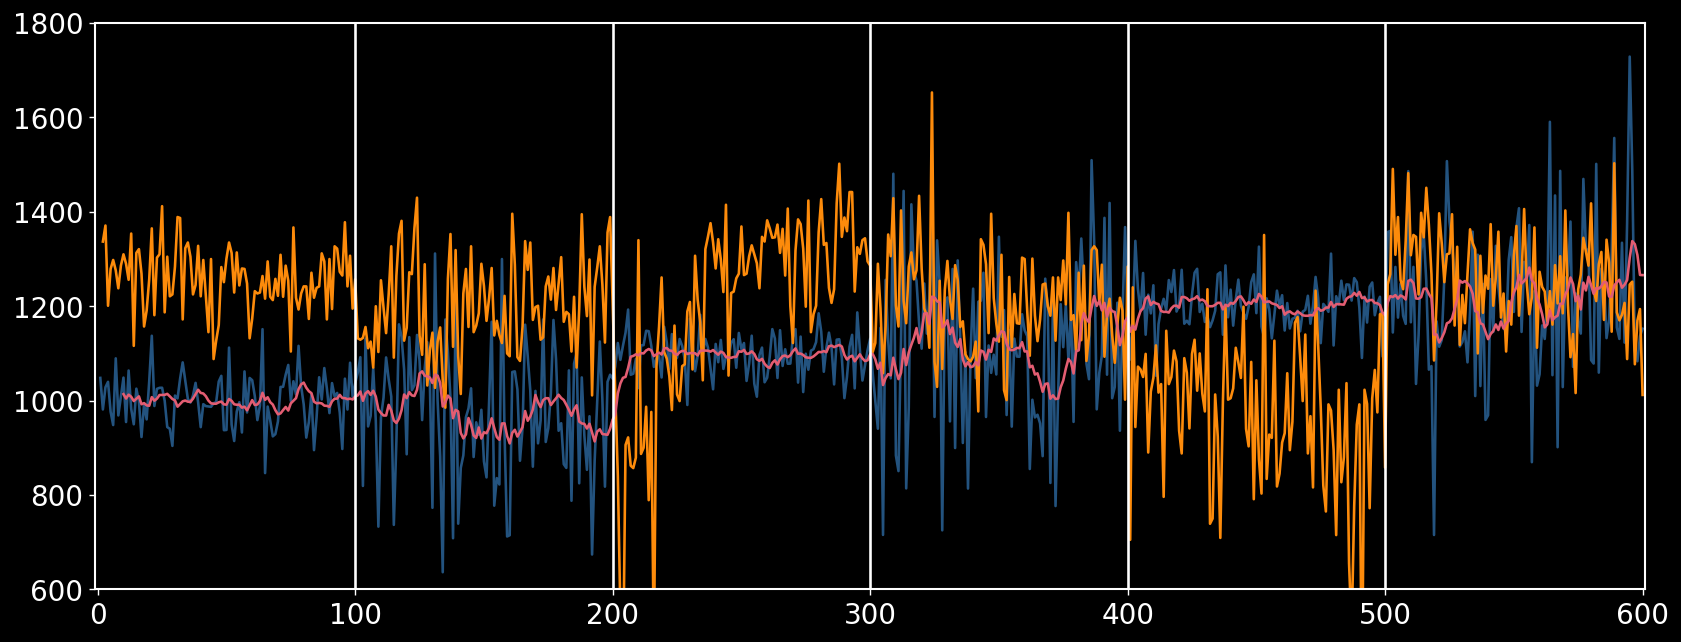

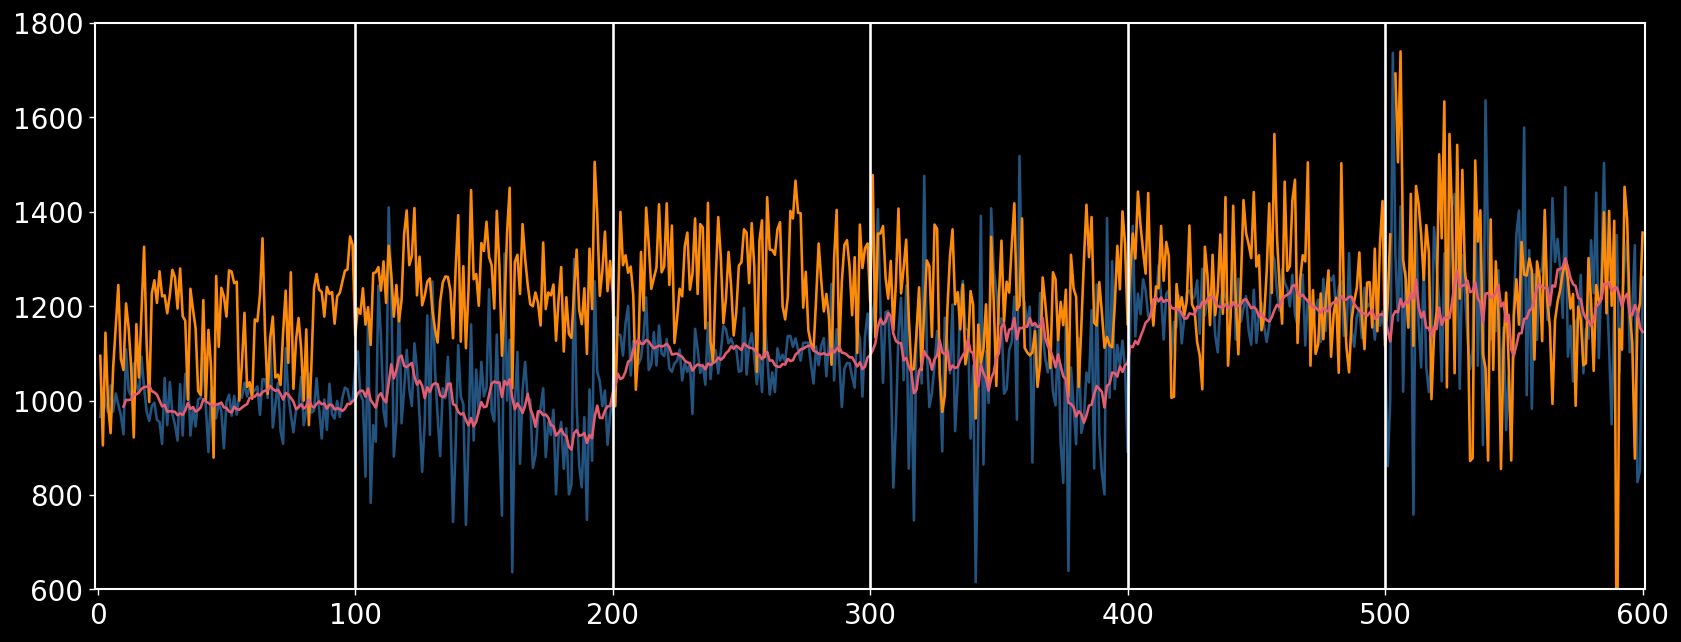

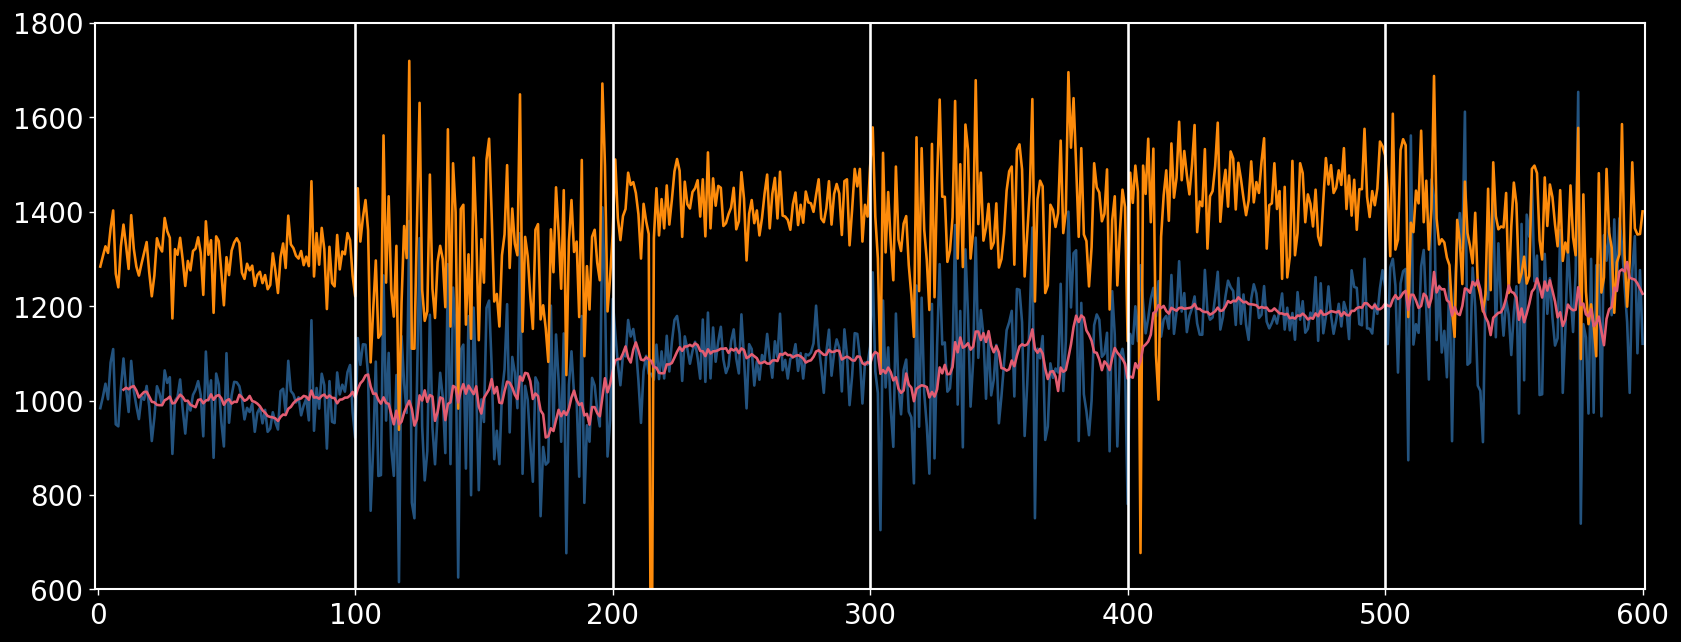

In [55]:
player_decision_time_all_conditions = np.reshape(player_decision_time,(num_subjects,-1))
agent_decision_time_all_conditions = np.reshape(agent_decision_time,(num_subjects,-1))
trial_num = np.arange(1,tot_trials+1)
block_cut = [100,200,300,400,500]
# Calculate running mean
N = 10
running_avg = np.zeros((num_subjects,tot_trials))
nan_array = np.zeros((N-1))*np.nan

for i in range(num_subjects):
    temp = np.convolve(agent_decision_time_all_conditions[i,:], np.ones(N)/N, mode='valid')
    running_avg[i,:] = np.concatenate((nan_array,temp))
for i in range(num_subjects):
    fig,ax = plt.subplots(dpi=125, figsize = (16,6))
    ax.plot(trial_num,agent_decision_time_all_conditions[i,:])
    ax.plot(trial_num,player_decision_time_all_conditions[i,:])

    ax.plot(trial_num,running_avg[i,:])
    for j in range(num_blocks-1):
        ax.axvline(x=block_cut[j])
        
    ax.set_xlim(-1,601)
    ax.set_ylim(600,1800)

Trial by Trial Player - Agent Decision Time

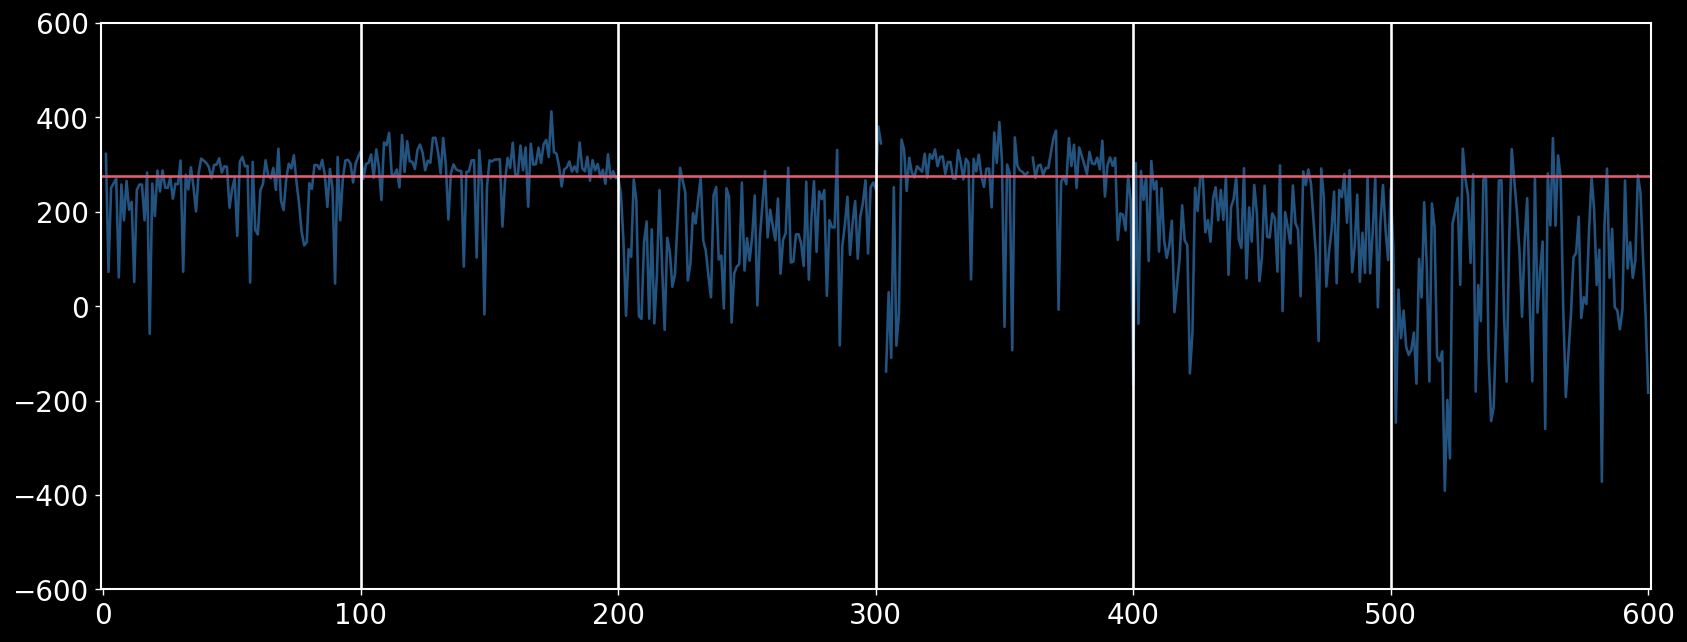

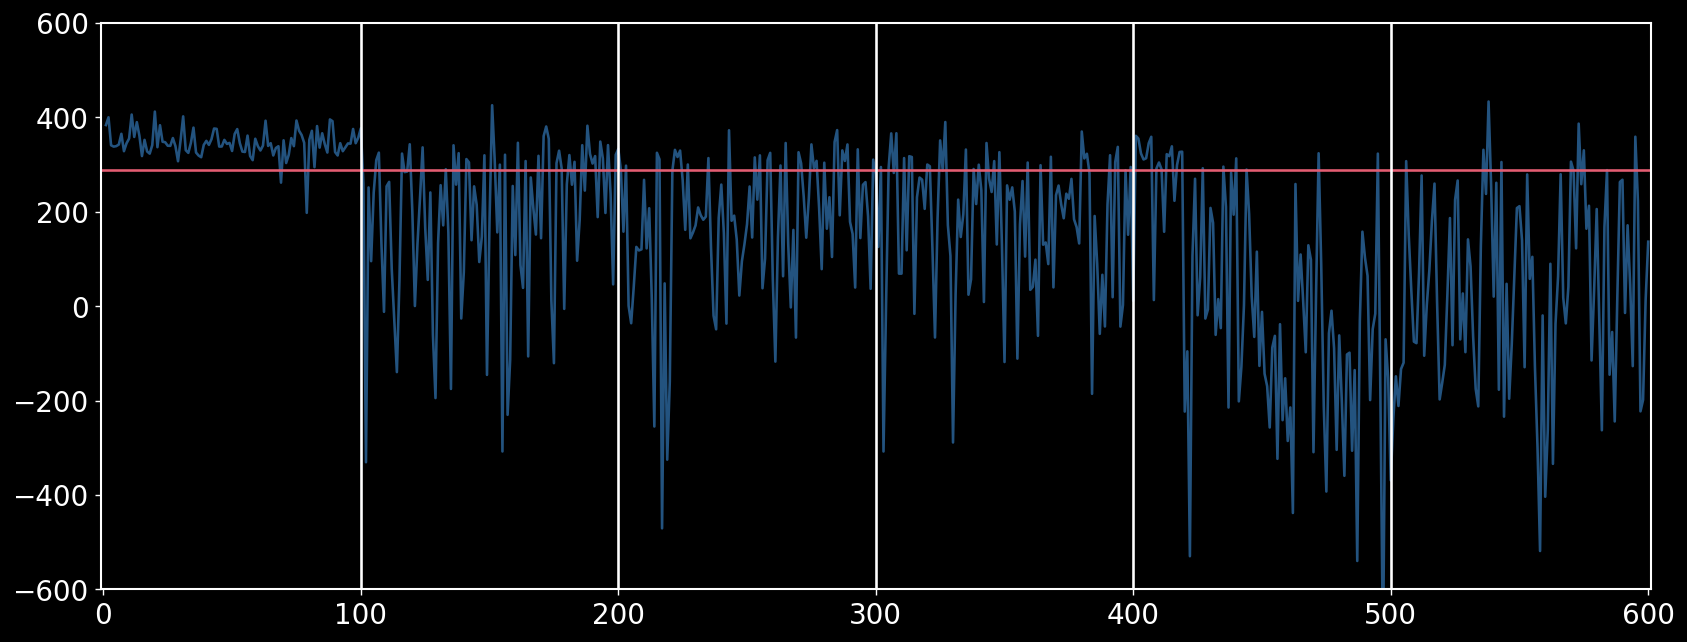

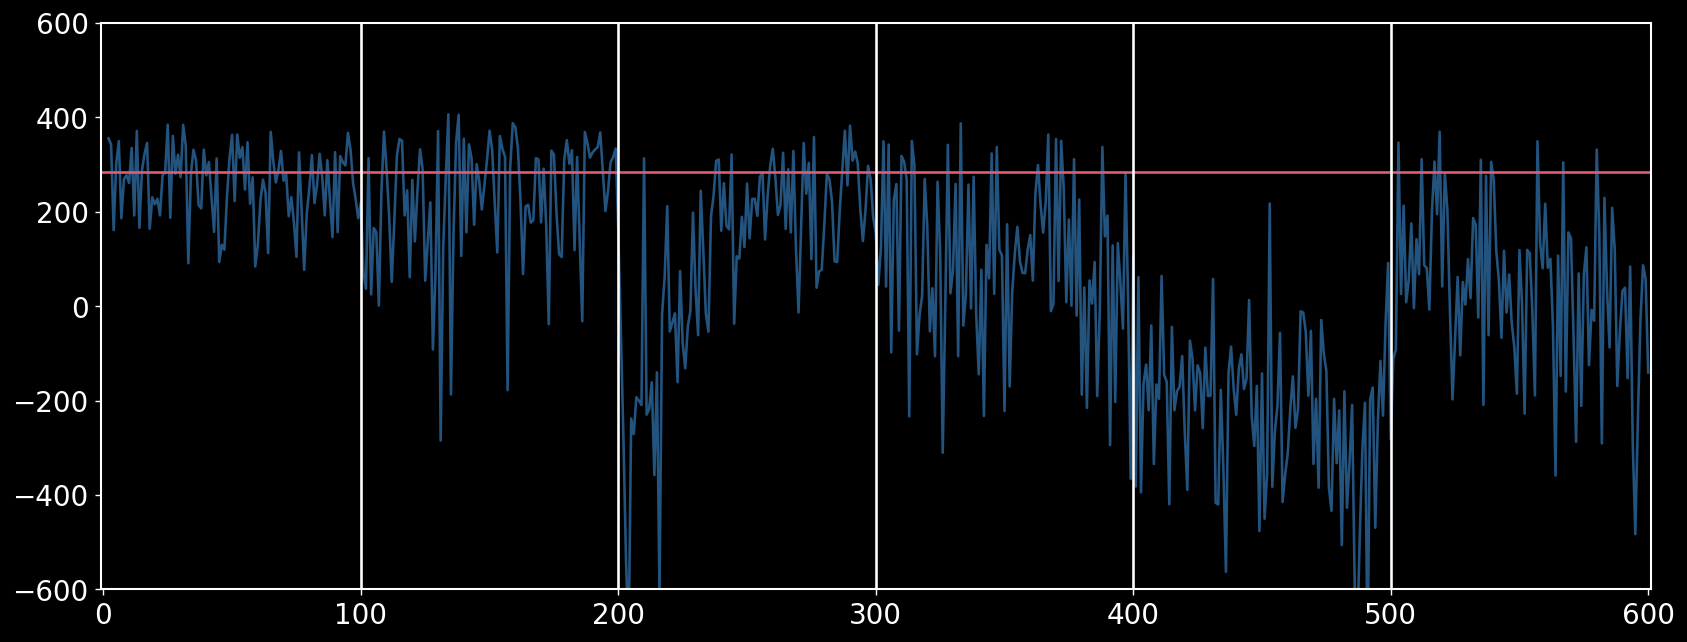

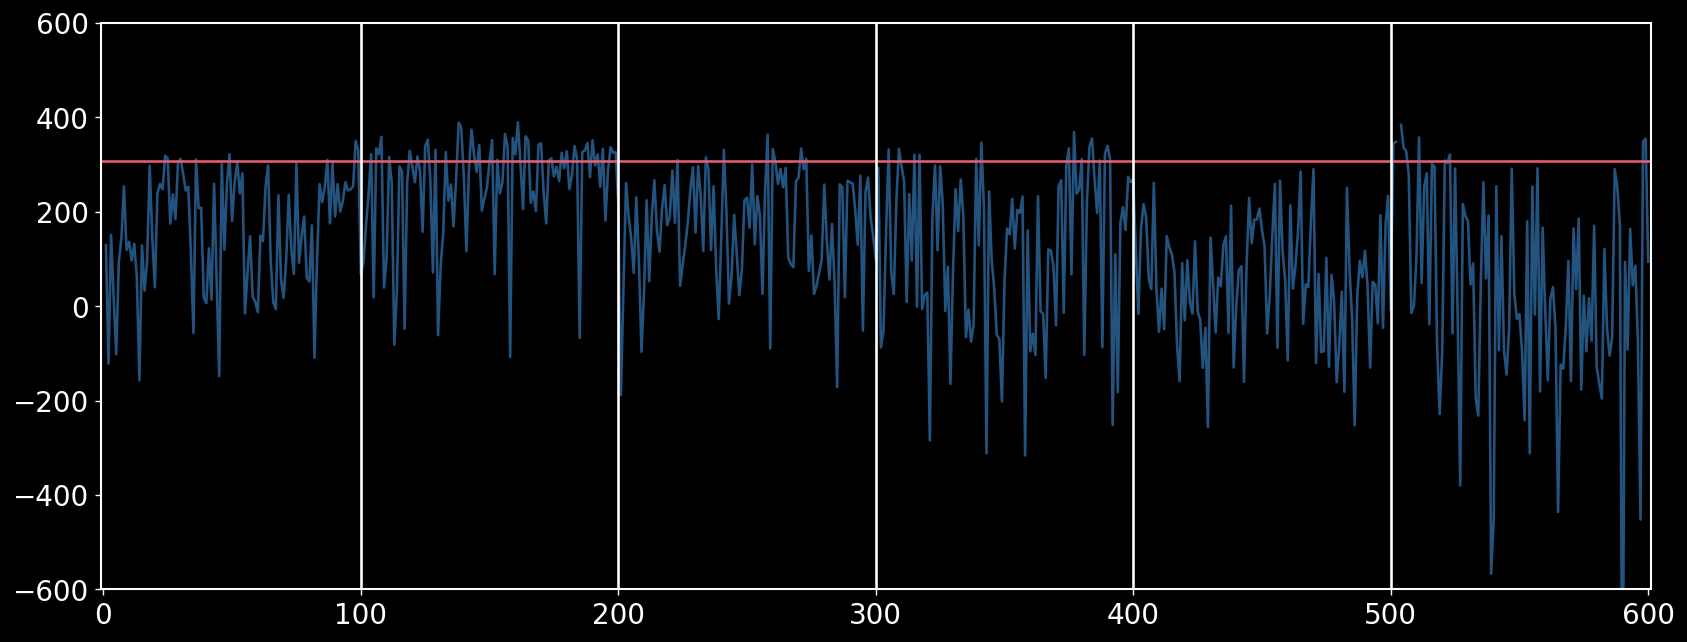

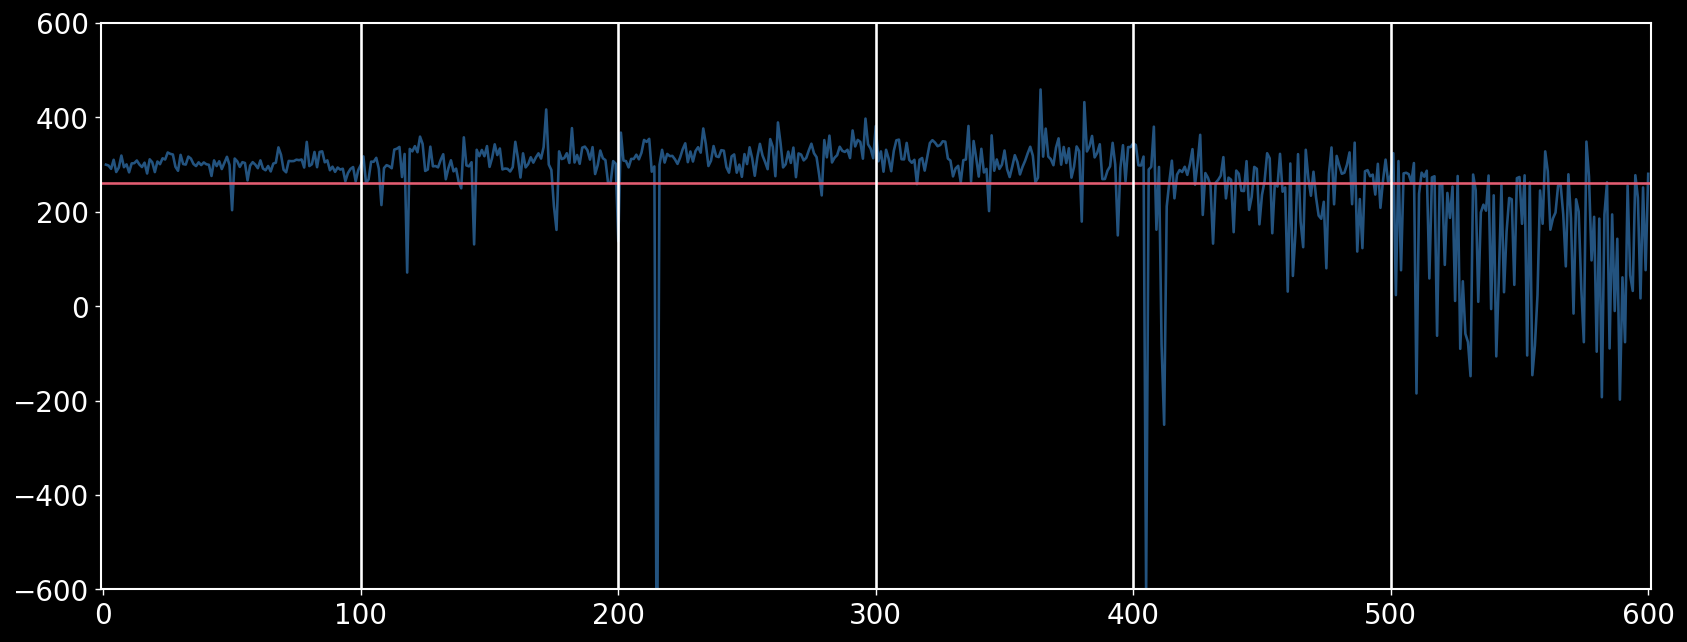

In [52]:
player_decision_time_all_conditions = np.reshape(player_decision_time,(num_subjects,-1))
agent_decision_time_all_conditions = np.reshape(agent_decision_time,(num_subjects,-1))
diff = player_decision_time_all_conditions-agent_decision_time_all_conditions
trial_num = np.arange(1,tot_trials+1)
block_cut = [100,200,300,400,500]
for i in range(num_subjects):
    fig,ax = plt.subplots(dpi=125, figsize = (16,6))
    ax.plot(trial_num,diff[i,:])
    ax.axhline(reaction_time_mean[i]-reaction_time_sd[i], c= wheel.rak_red)
    for j in range(num_blocks-1):
        ax.axvline(x=block_cut[j])
    ax.set_xlim(-1,601)
    ax.set_ylim(-600,600)